# Day 6: Lanternfish

## Part 1:

The sea floor is getting steeper. Maybe the sleigh keys got carried this way?

A massive school of glowing lanternfish swims past. They must spawn quickly to reach such large numbers - maybe exponentially quickly? You should model their growth rate to be sure.

Although you know nothing about this specific species of lanternfish, you make some guesses about their attributes. Surely, each lanternfish creates a new lanternfish once every 7 days.

However, this process isn't necessarily synchronized between every lanternfish - one lanternfish might have 2 days left until it creates another lanternfish, while another might have 4. So, you can model each fish as a single number that represents the number of days until it creates a new lanternfish.

Furthermore, you reason, a new lanternfish would surely need slightly longer before it's capable of producing more lanternfish: two more days for its first cycle.

So, suppose you have a lanternfish with an internal timer value of 3:

 - After one day, its internal timer would become 2.
 - After another day, its internal timer would become 1.
 - After another day, its internal timer would become 0.
 - After another day, its internal timer would reset to 6, and it would create a new lanternfish with an internal timer of 8.
 - After another day, the first lanternfish would have an internal timer of 5, and the second lanternfish would have an internal timer of 7.
 - A lanternfish that creates a new fish resets its timer to 6, not 7 (because 0 is included as a valid timer value). The new lanternfish starts with an internal timer of 8 and does not start counting down until the next day.

Realizing what you're trying to do, the submarine automatically produces a list of the ages of several hundred nearby lanternfish (your puzzle input). For example, suppose you were given the following list:

`3,4,3,1,2`

This list means that the first fish has an internal timer of 3, the second fish has an internal timer of 4, and so on until the fifth fish, which has an internal timer of 2. Simulating these fish over several days would proceed as follows:
```
Initial state: 3,4,3,1,2
After  1 day:  2,3,2,0,1
After  2 days: 1,2,1,6,0,8
After  3 days: 0,1,0,5,6,7,8
After  4 days: 6,0,6,4,5,6,7,8,8
After  5 days: 5,6,5,3,4,5,6,7,7,8
After  6 days: 4,5,4,2,3,4,5,6,6,7
After  7 days: 3,4,3,1,2,3,4,5,5,6
After  8 days: 2,3,2,0,1,2,3,4,4,5
After  9 days: 1,2,1,6,0,1,2,3,3,4,8
After 10 days: 0,1,0,5,6,0,1,2,2,3,7,8
After 11 days: 6,0,6,4,5,6,0,1,1,2,6,7,8,8,8
After 12 days: 5,6,5,3,4,5,6,0,0,1,5,6,7,7,7,8,8
After 13 days: 4,5,4,2,3,4,5,6,6,0,4,5,6,6,6,7,7,8,8
After 14 days: 3,4,3,1,2,3,4,5,5,6,3,4,5,5,5,6,6,7,7,8
After 15 days: 2,3,2,0,1,2,3,4,4,5,2,3,4,4,4,5,5,6,6,7
After 16 days: 1,2,1,6,0,1,2,3,3,4,1,2,3,3,3,4,4,5,5,6,8
After 17 days: 0,1,0,5,6,0,1,2,2,3,0,1,2,2,2,3,3,4,4,5,7,8
After 18 days: 6,0,6,4,5,6,0,1,1,2,6,0,1,1,1,2,2,3,3,4,6,7,8,8,8,8
```
Each day, a 0 becomes a 6 and adds a new 8 to the end of the list, while each other number decreases by 1 if it was present at the start of the day.

In this example, after 18 days, there are a total of 26 fish. After 80 days, there would be a total of 5934.

Find a way to simulate lanternfish. **How many lanternfish would there be after 80 days?**

In [1]:
# Get test input
with open('./test_input_6.txt') as f:
    lines = f.readlines()
test_input = [int(num) for num in lines[0].split(',')]
test_input

[3, 4, 3, 1, 2]

This seems pretty simple... *[Narrator: it wasn't as simple as it sounded.]*

In [2]:
fish = test_input.copy()
fish

[3, 4, 3, 1, 2]

In [3]:
for i in range(10):
    fish.append(8)
fish

[3, 4, 3, 1, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]

In [4]:
test_input

[3, 4, 3, 1, 2]

In [5]:
def timer(fish):
    new_fish = 0
    for i in range(len(fish)):
        if fish[i] > 0:
            fish[i] -= 1
        else:
            fish[i] = 6
            new_fish += 1   
    return new_fish

def solution(input_text, days):
    fish = input_text.copy()
    for _ in range(days):
        new_fish = timer(fish)
        for i in range(new_fish):
            fish.append(8)
    
    return len(fish)

In [6]:
solution(test_input, 80)
# 5934

5934

In [7]:
# Get full input
with open('./input_6.txt') as f:
    lines = f.readlines()
full_input = [int(num) for num in lines[0].split(',')]
full_input

[1,
 1,
 1,
 3,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 1,
 4,
 1,
 4,
 1,
 1,
 4,
 1,
 1,
 1,
 3,
 3,
 2,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 4,
 1,
 1,
 4,
 3,
 1,
 2,
 3,
 1,
 1,
 1,
 5,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 5,
 2,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 2,
 1,
 1,
 3,
 1,
 4,
 1,
 2,
 1,
 5,
 1,
 4,
 2,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 4,
 3,
 1,
 3,
 2,
 1,
 4,
 1,
 1,
 2,
 1,
 4,
 4,
 5,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 4,
 4,
 1,
 1,
 1,
 3,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 5,
 1,
 5,
 4,
 1,
 4,
 1,
 3,
 5,
 1,
 2,
 5,
 4,
 3,
 3,
 2,
 4,
 1,
 5,
 1,
 1,
 2,
 4,
 1,
 1,
 1,
 1,
 2,
 4,
 1,
 2,
 5,
 1,
 4,
 1,
 4,
 2,
 5,
 4,
 1,
 1,
 2,
 2,
 4,
 1,
 5,
 1,
 4,
 3,
 3,
 2,
 3,
 1,
 2,
 3,
 1,
 4,
 1,
 1,
 1,
 3,
 5,
 1,
 1,
 1,
 3,
 5,
 1,
 1,
 4,
 1,
 4,
 4,
 1,
 3,
 1,
 1,
 1,
 2,
 3,
 3,
 2,
 5,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 3,
 4,
 1,
 3,
 5,
 1,
 3,
 4,
 3,
 5,
 1,
 1,
 5,
 1,
 3,
 3,
 2,
 1,
 5,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 2,
 1,


In [8]:
solution(full_input, 80)

372984

## Part 2:

Suppose the lanternfish live forever and have unlimited food and space. Would they take over the entire ocean?

After 256 days in the example above, there would be a total of 26984457539 lanternfish!

**How many lanternfish would there be after 256 days?**

*Ah, it seems straightforward--just run the function with 256. However, I suspect that this number is too large and will result in hanging code and an overwhelmed processor. Clearly there must be another way to calculate this that doesn't take exponential time!

In [55]:
solution(full_input, 256)

KeyboardInterrupt: 

In [9]:
def timer(fish):
    new_fish = 0
    for i in range(len(fish)):
        if fish[i] > 0:
            fish[i] -= 1
        else:
            fish[i] = 6
            new_fish += 1   
    return new_fish

def long_solution(input_text, days):
    fish = input_text.copy()
    new_fish_counts = []
    sums = []
    total_num_fish = []
    for _ in range(days):
        new_fish = timer(fish)
        new_fish_counts.append(new_fish)
        for i in range(new_fish):
            fish.append(8)
        sums.append(sum(fish))
        total_num_fish.append(len(fish))
    
    return new_fish_counts, sums, total_num_fish

In [10]:
counts, sums, fish = long_solution(test_input, 100)

In [11]:
import matplotlib.pyplot as plt

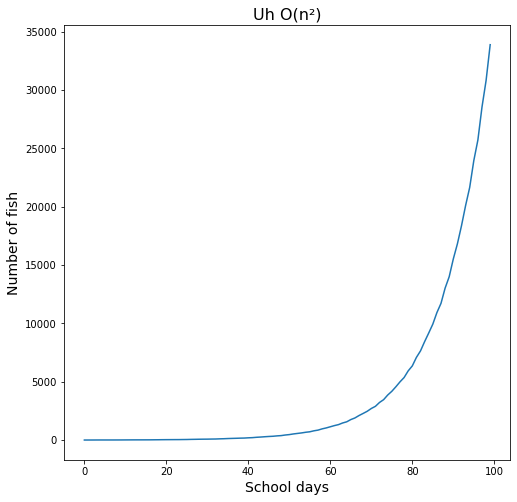

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
# ax.plot(counts)
# ax.plot(sums)
ax.plot(fish)
# ax.legend(['counts', 'sums', 'fish'])
ax.set_title('Uh O(n²)', size=16)
ax.set_ylabel('Number of fish', size=14)
ax.set_xlabel('School days', size=14);

Exponential time! Gotta find another way.

There must be something about calculating the time that each fish has left and then factoring based on the day that it is...

Remainders/mods? Length of the array?

What about calculating, based on the number current fish and their values, how many new fish *just those fish* will create in time $t$? Then maybe run that recursively?

In [162]:
def how_many_fish_from_originals(input_text, t):
    fish = input_text.copy()
    new_fish_list = []
    running_total = []
    for _ in range(t):
        new_fish = 0
        for i in range(len(fish)):
            if fish[i] > 0:
                fish[i] -= 1
            else:
                fish[i] = 6
                new_fish += 1   
        new_fish_list.append(new_fish)
        running_total.append(sum(new_fish_list))
    return new_fish_list, running_total

In [163]:
new_fish, running_total = how_many_fish_from_originals(test_input, 21)

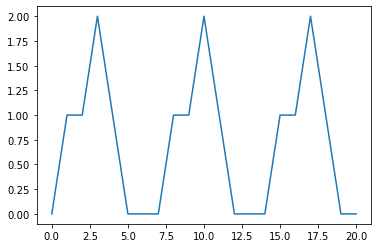

In [164]:
plt.plot(new_fish);

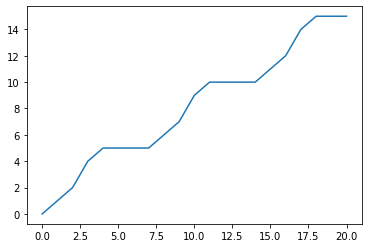

In [165]:
plt.plot(running_total);

In [166]:
new_fish

[0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0]

The reproduction pattern repeats every 7 days (duh). I wonder if I can use this resursively to calculate the total number of new fish each fish will produce in the time that it has left (`day[birthday]` to `day[last day]`).

In [167]:
new_fish, running_total = how_many_fish_from_originals(test_input, 7)

In [168]:
print(new_fish)
sum(new_fish)

[0, 1, 1, 2, 1, 0, 0]


5

Every 7 days, the original fish make 5 new fish--they double their own population every 5 days...

This is just a population growth problem! The formula given [here](https://calculator.academy/population-growth-calculator/#f1p0|f2p0) is $x(t) = x_0 \times (1+r)^t$. Will that work for this case? Not sure; I have to figure out the growth rate.

I know that $\frac{26}{5} = (1+r)^{\text18 days}$ and $\frac{5934}{5} = (1+r)^{\text80 days}$

In [169]:
5*(1+1)**(18/7)

29.719885782738974

In [170]:
5*(2**(80/7))

13782.01797255533

In [178]:
new_fish, running_total = how_many_fish_from_originals(full_input, 15)

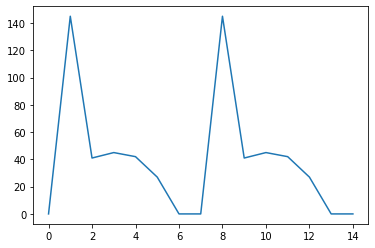

In [179]:
plt.plot(new_fish)

In [189]:
new_fish

[0, 145, 41, 45, 42, 27, 0, 0, 145, 41, 45, 42, 27, 0, 0]

In [180]:
for i, total in enumerate(running_total):
    print(i, total)

0 0
1 145
2 186
3 231
4 273
5 300
6 300
7 300
8 445
9 486
10 531
11 573
12 600
13 600
14 600


In [174]:
len(full_input)

300

In [187]:
300*(2**(256/7))
# too high

30635024994652.574

In [181]:
def total_from_original(input_text, t):
    return len(input_text)*(t/7)

In [182]:
total_from_original(full_input, 14)

600.0

In [183]:
total_from_original(full_input, 21)

900.0

In [190]:
total_from_original(full_input, 256)

10971.42857142857

In [188]:
256./7

36.57142857142857

Let's start with super basic and add complexity.

In [191]:
# Simplest would be 1 fish w/highest possible counter
simple_fish = [6]

In [193]:
def timer(fish):
    new_fish = 0
    for i in range(len(fish)):
        if fish[i] > 0:
            fish[i] -= 1
        else:
            fish[i] = 6
            new_fish += 1   
    return new_fish

def solution(input_text, days):
    fish = input_text.copy()
    for _ in range(days):
        new_fish = timer(fish)
        for i in range(new_fish):
            fish.append(8)
    
    return len(fish)

In [194]:
def how_many_fish_from_originals(input_text, t):
    fish = input_text.copy()
    new_fish_list = []
    running_total = []
    for _ in range(t):
        new_fish = 0
        for i in range(len(fish)):
            if fish[i] > 0:
                fish[i] -= 1
            else:
                fish[i] = 6
                new_fish += 1   
        new_fish_list.append(new_fish)
        running_total.append(sum(new_fish_list))
    return new_fish_list, running_total

In [196]:
def plot_info(input_text, t):
    new_fish, running_total = how_many_fish_from_originals(input_text, t)
    plt.plot(new_fish)
    plt.plot(running_total)
    return

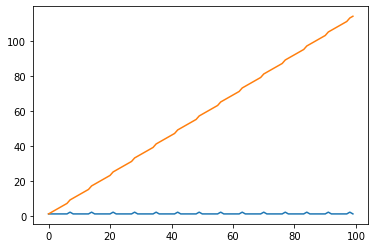

In [201]:
plot_info([7, 6, 5, 4, 3, 2, 1, 0], 100)

I found a hint that says you only need a 9-element array to solve this???? 🤯

Okay, let's think: what if you use a 9-element array where the index represents number of days left on the counter and the value is how many fish have that time left? In that case, the test-input:

`[3, 4, 2, 1, 2]` 

would be represented as:

`[0, 1, 2, 1, 1, 0, 0, 0, 0]`

Now what?

OMG. Of course--you just subtract as you normally would, but now you just count differently. Instead of counting down each element and then appending more elements, you shift numbers down and then add new amounts to the final index.

In [202]:
# Need to shift elements easily
from collections import deque

In [203]:
test = [0, 1, 2, 3, 4, 5, 6, 7, 8]

In [204]:
d_test = deque(test)
d_test

deque([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [205]:
d_test.rotate(-1)

In [208]:
d_test

deque([1, 2, 3, 4, 5, 6, 7, 8, 0])

In [216]:
def efficient_solution(input_text, t):
    effishent_fishnet = deque([0]*9)
    for val in input_text:
        effishent_fishnet[val] += 1
    
    for _ in range(t):
        temp = effishent_fishnet[0]
        effishent_fishnet.rotate(-1)
        effishent_fishnet[6] += temp
        
    return sum(effishent_fishnet)

In [217]:
test_input

[3, 4, 3, 1, 2]

In [219]:
# Test part 1 solution w/test_input
efficient_solution(test_input, 80)
# 5934

5934

In [220]:
# Test part 1 solution w/full_input
efficient_solution(full_input, 80)
# 372984

372984

In [222]:
# Part 2 solution w/test_input
efficient_solution(test_input, 256)
# 26984457539

26984457539

In [223]:
# Test part 2 solution w/full_input
efficient_solution(full_input, 256)

1681503251694

YES!!!